# Model of chemotaxis

In this notebook let's explore the simulation of chemotaxis. We will compare two possible models. The first one - classical model, assumes that cells sense the concentration gradient of a substance and are able to move into the direction of increasing concentration. In the second model, cells do the same but after they make a move they also consume some amount of substance at their location. The goal of our simulation is to find out if the second, so called self-generated model, has any advantages over the simpler model.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from ipywidgets import interact, interact_manual, fixed

from run import *

Let's upload the maze map. Different maps are created in the Figma - online graphical editor, and saved as .png images. 

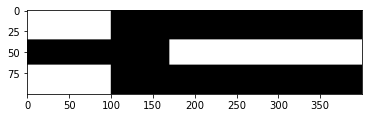

In [3]:
path = 'graphics/maze1.png'
create_gridmap(path)

## Experiments

<br> First of all, let's explore the parameters of the model. <br>
1. __D__ is a so called mass diffusivity coefficient. It is the  parameter in the model that describes diffusion. The higher it is, the faster the substance is spread out. 
2. __C__ is the second and last parameter to describe diffusion. It is the initial concentration in the point source of the substance. Note, that the energy perservation works in the simulation. So the C will only descrease if substance is "eaten" by cells.
3. __n__ is the number of cells in the simulation.
4. __k_max__ is the parameter described more precisely in the pdf to this simulation. It originated from Michaelis-Menten kinetics and describes the concentation at the half the maxmimum speed of reaction. 
5. __V_max__ similarly coming from Michaelis-Menten kinetics describes the maximum speed of reaction. 
6. __self_generated__ is the binary parameters. It runs self-generated model if selected, if not runs classical model.
7. __n_runs__ describes the experiment itself, it sets the amount of generation the simulation should evolve. 

<br> Let's run the first simulation for only n_runs=500 to obtain the concentration map that we use next. <br>

In [4]:
sources = [
    [80, 370]
]


interact_manual(run_experiment, sources=fixed(sources))

interactive(children=(FloatSlider(value=500.05, description='Diffusivity', max=1000.0, min=0.1), IntSlider(val…

<function run.run_experiment(Diffusivity=(0.1, 1000.0), Concentration=(1000, 7000), n=(1, 100), k_max=(0.0, 1.0), V_max=(0.0, 1.0), self_generated=False, n_runs=(500, 10000), save=False, folder_name=' ', sources=None, kinetics_plot=False, unequal_sources=False)>

First of all, we observe that the big population is divided into two populations and each moves to its own source. Further, we see that the higher the parameters of Concentration and Diffusivity, the shorter is the time scale. If sources are unequal, cells still do prefer to move to the closest one, not to the bigger one. This is even true if the difference between two sources is higher than 14 times. 

### Michaelis-Menten kinetics

Before going to further experiments let's first look at the Michaelis-Menten kinetics as we use it in the simulation. Here, we can play with parameters to see how it changes the kinetics.

In [15]:
interact_manual(kinetics, continuous_update=True)

interactive(children=(IntSlider(value=250, description='k_max', max=500), FloatSlider(value=0.55, description=…

<function run.kinetics(k_max=(0, 500), V_max=(0.1, 1))>

Here, we can plot the decreasing concentration the rate of which will be dependent on the parameters from Michaelis-Menten kinetics. Select kinetics_plot to visualize the plot of these concentrations. 

In [24]:
sources = [
    [80, 370]
]

interact_manual(run_experiment, sources=fixed(sources))

interactive(children=(FloatSlider(value=500.05, description='Diffusivity', max=1000.0, min=0.1), IntSlider(val…

<function run.run_experiment(Diffusivity=(0.1, 1000.0), Concentration=(1000, 7000), n=(1, 100), k_max=(0.0, 1.0), V_max=(0.0, 1.0), self_generated=False, n_runs=(500, 10000), save=False, folder_name=' ', sources=None, kinetics_plot=False, unequal_sources=False)>

Now as we see how this parameter work let's start with exploring the model. For that, we will start with setting the concentration sources. It can be any number of sources defined as list of 2 coordinates pairs, each pair of x,y coordinate for one source. 



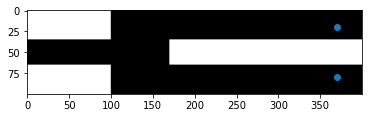

In [25]:
sources = [
    [80, 370],
    [20, 370]
]

show_sources(sources)

Now, having these sources defined let's compare the behaviour of simple vs self-generated model in a simple maze with two sources. We can do so using the self_generated parameter.  

In [26]:
interact_manual(run_experiment, sources=fixed(sources))

interactive(children=(FloatSlider(value=500.05, description='Diffusivity', max=1000.0, min=0.1), IntSlider(val…

<function run.run_experiment(Diffusivity=(0.1, 1000.0), Concentration=(1000, 7000), n=(1, 100), k_max=(0.0, 1.0), V_max=(0.0, 1.0), self_generated=False, n_runs=(500, 10000), save=False, folder_name=' ', sources=None, kinetics_plot=False, unequal_sources=False)>

Then, we can make the same experiment but having only one source defined and see how two models behave.

In [27]:
sources = [
    [80, 370]
]

interact_manual(run_experiment, sources=fixed(sources))

interactive(children=(FloatSlider(value=500.05, description='Diffusivity', max=1000.0, min=0.1), IntSlider(val…

<function run.run_experiment(Diffusivity=(0.1, 1000.0), Concentration=(1000, 7000), n=(1, 100), k_max=(0.0, 1.0), V_max=(0.0, 1.0), self_generated=False, n_runs=(500, 10000), save=False, folder_name=' ', sources=None, kinetics_plot=False, unequal_sources=False)>

Next, we can experiment with the same settings but in a different environment. We will use the maze with one short dead end and one long path with a substance. 

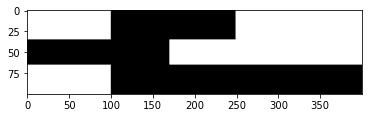

In [28]:
path = 'graphics/maze2_dead_end.png'
create_gridmap(path)

Let's again set sources.

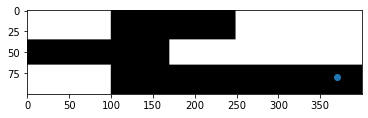

In [29]:
sources = [
    [80, 370]
]

show_sources(sources)

And run the similar set of experiment. 

In [30]:
interact_manual(run_experiment, sources=fixed(sources))

interactive(children=(FloatSlider(value=500.05, description='Diffusivity', max=1000.0, min=0.1), IntSlider(val…

<function run.run_experiment(Diffusivity=(0.1, 1000.0), Concentration=(1000, 7000), n=(1, 100), k_max=(0.0, 1.0), V_max=(0.0, 1.0), self_generated=False, n_runs=(500, 10000), save=False, folder_name=' ', sources=None, kinetics_plot=False, unequal_sources=False)>

We can also play with a complex maze to see how two model model perform in comparison.

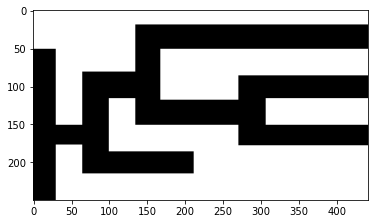

In [5]:
path = 'graphics/maze3.png'
create_gridmap(path)

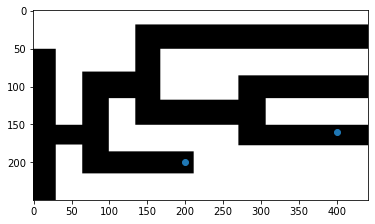

In [6]:
# sources = [ [35,400],
#     [160, 400]
# ]

sources = [ [200,200],
    [160, 400]
]
show_sources(sources)

In [34]:
interact_manual(run_experiment, sources=fixed(sources));

interactive(children=(FloatSlider(value=500.05, description='Diffusivity', max=1000.0, min=0.1), IntSlider(val…

# The solution to a complex maze

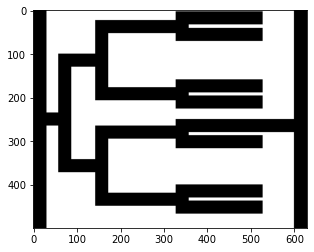

In [7]:
path = 'graphics/maze_4.png'
create_gridmap(path)

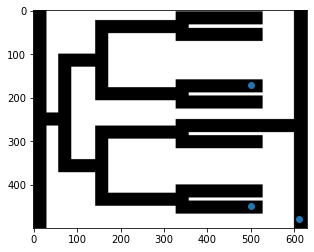

In [8]:
sources = [ [480,610],
    [450, 500], [170, 500]
]
show_sources(sources)

For the simple imposed gradient model, cells travel to the closed arm with the source, even if the source is not largest one. 

In [9]:
interact_manual(run_experiment, sources=fixed(sources))

interactive(children=(FloatSlider(value=500.05, description='Diffusivity', max=1000.0, min=0.1), IntSlider(val…

<function run.run_experiment(Diffusivity=(0.1, 1000.0), Concentration=(1000, 7000), n=(1, 100), k_max=(0.0, 1.0), V_max=(0.0, 1.0), self_generated=False, n_runs=(500, 10000), save=False, folder_name=' ', sources=None, kinetics_plot=False, unequal_sources=False)>